### 遷移行列によるバネマス系の微分方程式の解法

In [1]:
import numpy as np
import pandas as pd
%matplotlib notebook
import matplotlib.pyplot as plt

#### システムデザイン

In [7]:
m = 2.5  # mass [kg]
k = 1.2  # spring constant [N/m]
c = 0.01  # dumper constant [Ns/m]

In [8]:
def a_matrix(m, k, c):
    return np.matrix([[-c/m, -k/m], [1, 0]])
def b_matrix(m):
    return np.matrix([1/m, 0]).transpose()
def c_matrix():
    return np.matrix([0, 1])
def d_matrix():
    return np.matrix([0, 0])

In [31]:
def state_equation(A, B, x, u):
    return np.dot(A, x) + np.dot(B, u)
def output_equation(C, D, x, u):
    return np.dot(C, x) + np.dot(D, u)
def transfer_matrix(A, dt):
    # 第4項までの近似
    I = np.eye(A.shape[0])
    A_2 = np.dot(A, A)
    A_3 = np.dot(A, A_2)
    dt_2 = dt*dt
    dt_3 = dt*dt_2
    return I + A*dt + 0.5*A_2*dt_2 + 0.111111111*A_3*dt_3

In [51]:
# initial value
A = a_matrix(m, k, c)
B = b_matrix(m)
C = c_matrix()
D = d_matrix()
dt = 0.5
Phi = transfer_matrix(A, dt)
xn = np.matrix([1.0, 0]).transpose()
t = [0,]
y = [xn[1],]
# transfer calculation
for n in np.arange(1, 1000, 1):
    xn = np.dot(Phi, xn)
    t.append(n*dt)
    y.append(xn[1].item())

<IPython.core.display.Javascript object>


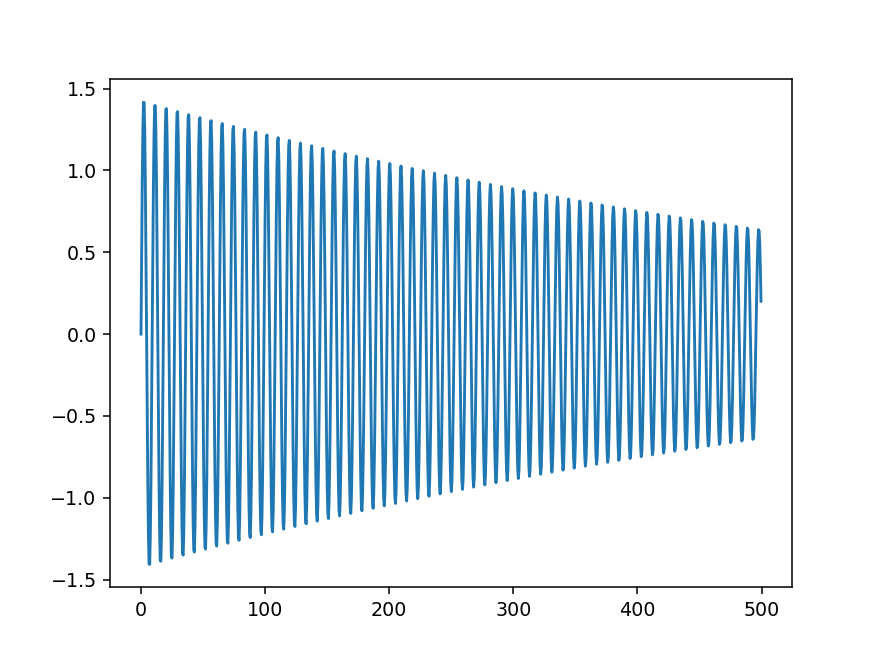

In [52]:
plt.plot(t, y)

In [ ]:
data = pd.DataFrame()
t_range = 100  # [s]
dt = 0.1  # [s]
data['t'] = np.arange(0, t_range + dt, dt)
data['f'] = f(2 * np.pi * freq * data.t)
data['dfdt'] = exact_diff(2 * np.pi * freq * data.t)
data['dfdt2'] = numerical_diff_2pnts_approx(f, 2 * np.pi * freq * data.t)
data['dfdt3'] = numerical_diff_3pnts_approx(f, 2 * np.pi * freq * data.t)

#### 必要な精度と次数について
A, A^2, A^3, ...と何次まで計算すれば必要な精度が得られるかは、時間刻みdtと系の固有振動周波数の関係で変わる。今回の例では、バネマス振動周波数と時間刻み。
これまでの経験上、振動周期の1/50から1/100の時間刻みの場合は3次までで十分な精度が得られる。

#### 計算コストについて
オーダーを知るには、、、